In [56]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [5]:
cd ../datasets

C:\Users\lamtr\mlcourse.ai\datasets


In [11]:
#load data
data = pd.read_csv("microchip_tests.txt", header=None, names=["test1", "test2", "type"])

In [12]:
data

,test1,test2,type
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test1   118 non-null    float64
 1   test2   118 non-null    float64
 2   type    118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [15]:
data.describe()

,test1,test2,type
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [23]:
X = data[data.columns[:2]].values
y = data[data.columns[-1]].values

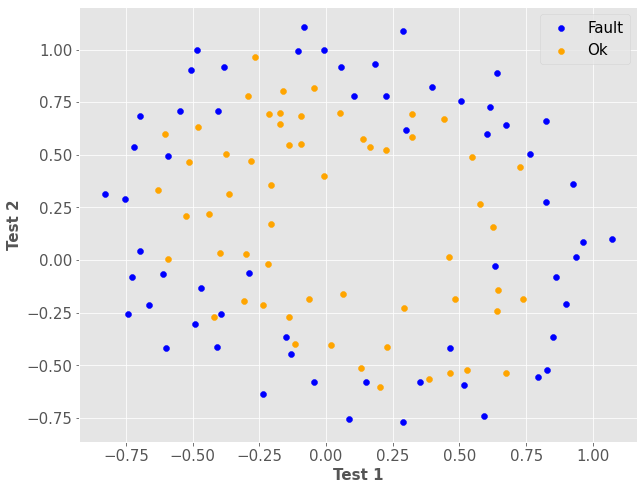

In [39]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.scatter(X[y==0, 0], X[y==0, 1], c="Blue")
plt.scatter(X[y==1, 0], X[y==1, 1], c="Orange")
plt.legend(["Fault", "Ok"], fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Test 1", fontsize=15)
plt.ylabel("Test 2", fontsize=15)
plt.rc("axes", labelweight="heavy");

In [44]:
np.hstack??

In [53]:
np.c_[[1,2,3], [4,5,6]]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [98]:
def decision_boundary(clf, X, y, poly_featurizer):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = logreg.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y==0, 0], X[y==0, 1], c="Blue")
    plt.scatter(X[y==1, 0], X[y==1, 1], c="Orange")
    plt.legend(["Fault", "Ok"], fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Test 1", fontsize=15)
    plt.ylabel("Test 2", fontsize=15)
    plt.rc("axes", labelweight="heavy")
    plt.contour(xx, yy, zz,colors="orange", linewidths=0.3)

Accuracy: 0.6271186440677966


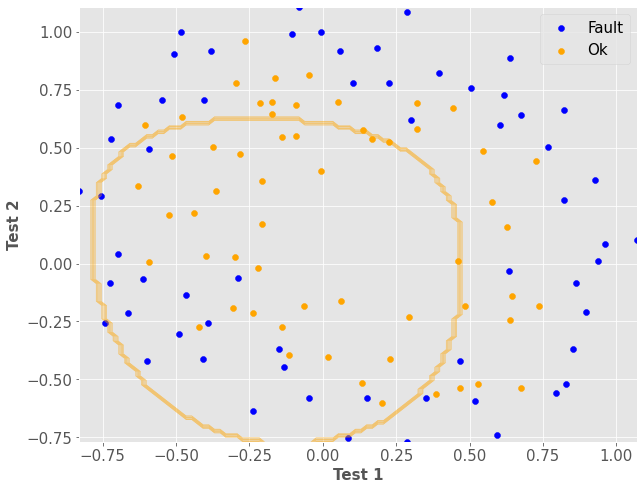

In [103]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

logreg = LogisticRegression(C=1e-2)
logreg.fit(X_poly, y)
print("Accuracy:", logreg.score(X_poly, y))

decision_boundary(logreg, X, y, poly)

Accuracy: 0.8305084745762712


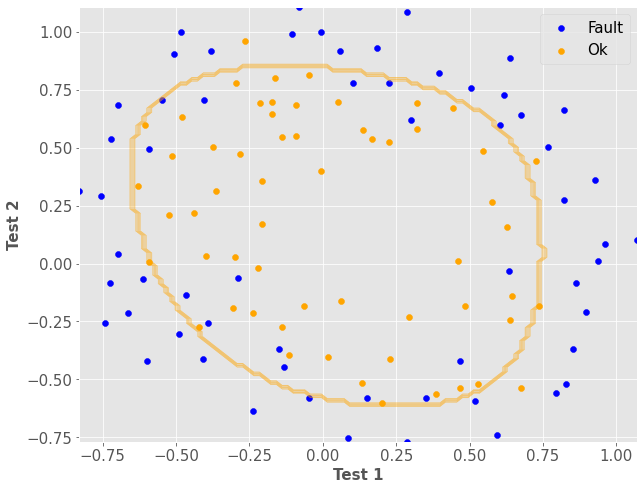

In [102]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

logreg = LogisticRegression(C=1)
logreg.fit(X_poly, y)
print("Accuracy:", logreg.score(X_poly, y))
decision_boundary(logreg, X, y, poly)

Accuracy: 0.8813559322033898


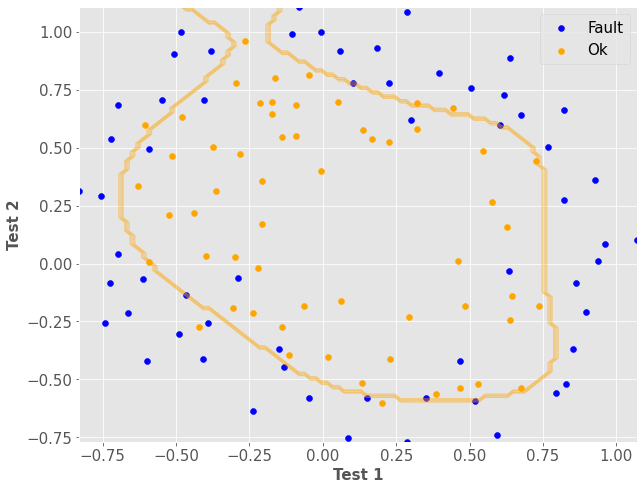

In [107]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

logreg = LogisticRegression(C=10000000000)
logreg.fit(X_poly, y)
print("Accuracy:", logreg.score(X_poly, y))
decision_boundary(logreg, X, y, poly)

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

In [136]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cs = np.logspace(-2, 3, num=500)
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
logregCV = LogisticRegressionCV(Cs=cs, cv=skf, n_jobs=-1)
logregCV.fit(X_poly,  y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [137]:
logregCV.C_

array([150.78450459])

In [144]:
logregCV.scores_[1].shape

(5, 500)

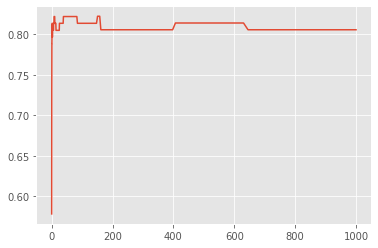

In [146]:
plt.plot(logregCV.Cs_, np.mean(logregCV.scores_[1], axis=0))

In [147]:
logregCV.Cs_

array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62338243e-02, 1.66127252e-02, 1.70004698e-02,
       1.73972643e-02, 1.78033202e-02, 1.82188534e-02, 1.86440853e-02,
       1.90792422e-02, 1.95245558e-02, 1.99802631e-02, 2.04466067e-02,
       2.09238348e-02, 2.14122015e-02, 2.19119669e-02, 2.24233968e-02,
       2.29467637e-02, 2.34823460e-02, 2.40304289e-02, 2.45913043e-02,
       2.51652705e-02, 2.57526333e-02, 2.63537052e-02, 2.69688063e-02,
       2.75982639e-02, 2.82424133e-02, 2.89015972e-02, 2.95761666e-02,
       3.02664806e-02, 3.09729067e-02, 3.16958209e-02, 3.24356081e-02,
       3.31926620e-02, 3.39673858e-02, 3.47601918e-02, 3.55715021e-02,
      